In [1]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt




In [3]:
image = Image.open('cat_gray.PNG')


In [4]:
type(image)

PIL.PngImagePlugin.PngImageFile

In [8]:
image.size

(225, 246)

In [9]:
image.mode

'RGBA'

In [12]:
image = image.convert('L') # Gray Scale

In [13]:
image.mode

'L'

In [16]:
image = image.resize((256,256))

In [17]:
image.size


(256, 256)

In [20]:
## Basic normalization - convert to numpy array first and then normalize

In [21]:
image = np.array(image, dtype = 'float32')

In [22]:
type(image)

numpy.ndarray

In [23]:
image.shape

(256, 256)

In [24]:
image = image/255

In [25]:
## We are using tensorflow convo2d which has certain rules in which manner we need to provide the input
## We need to provide 4 things - height,width, batch_size and channel. height and width we have but batch_size and channel are not present
## So we add 1 axis in the start and 1 axis at the end

In [26]:
image = np.expand_dims(image,axis=(0,-1))


In [27]:
image.size

65536

In [28]:
image.shape

(1, 256, 256, 1)

In [29]:
## Vertical Filter

In [32]:
vertical_filter = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])

In [33]:
vertical_filter

array([[ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1]])

In [34]:
vertical_filter.shape

(3, 3)

In [35]:
## Horizontal Filter

In [36]:
horizontal_filter = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])

In [37]:
horizontal_filter

array([[ 1,  1,  1],
       [ 0,  0,  0],
       [-1, -1, -1]])

In [38]:
## Reshape the filters in accordance with tensorflow API

In [41]:
vertical_filter = vertical_filter.reshape((3,3,1,1)) # H, W, in_channels, out_channels

In [42]:
vertical_filter

array([[[[ 1]],

        [[ 0]],

        [[-1]]],


       [[[ 1]],

        [[ 0]],

        [[-1]]],


       [[[ 1]],

        [[ 0]],

        [[-1]]]])

In [43]:
vertical_filter.shape

(3, 3, 1, 1)

In [44]:
horizontal_filter = horizontal_filter.reshape((3,3,1,1))

In [45]:
## Apply the convolution

In [46]:
vertical_edges = tf.nn.conv2d(image, vertical_filter, strides=1, padding='SAME')

In [47]:
horizontal_edges = tf.nn.conv2d(image, horizontal_filter, strides=1, padding='SAME')

In [48]:
image.shape

(1, 256, 256, 1)

In [49]:
## Convert tensors to numpy arrays for visualization

In [50]:
vertical_edges = vertical_edges.numpy().squeeze()

In [52]:
vertical_edges.shape

(256, 256)

In [53]:
horizontal_edges =  horizontal_edges.numpy().squeeze()

In [55]:
horizontal_edges.shape

(256, 256)

In [56]:
## Plotting the images

In [57]:
plt.figure(figsize=(10,4))

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

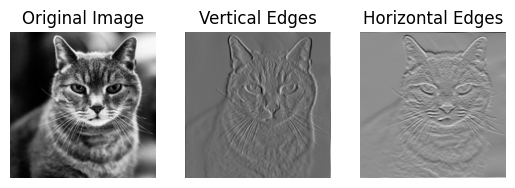

In [60]:
plt.subplot(1,3,1)
plt.imshow(image.squeeze(),cmap='gray')
plt.title('Original Image')
plt.axis('off')


plt.subplot(1,3,2)
plt.imshow(vertical_edges,cmap='gray')
plt.title('Vertical Edges')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(horizontal_edges,cmap='gray')
plt.title('Horizontal Edges')
plt.axis('off')

plt.show()